In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf
from tensorflow.contrib import skflow



In [2]:


titanic_df = pd.read_excel('/home/rohan/CodeLabs/titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])



In [3]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic_df.groupby(['pclass','sex']).mean()


survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

In [5]:
class_sex_groupting = titanic_df.groupby(['pclass','sex']).mean()
class_sex_groupting

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

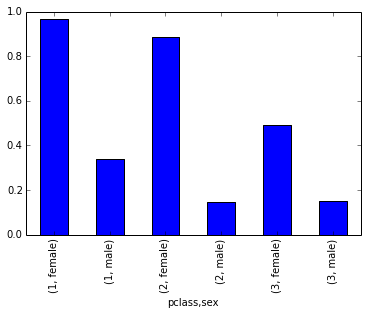

In [6]:
class_sex_groupting['survived'].plot(kind = 'bar')

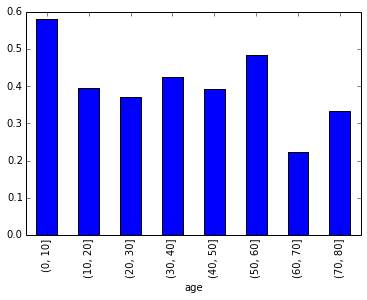

In [7]:


group_by_age = pd.cut(titanic_df["age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['survived'].plot(kind = 'bar')



In [8]:
titanic_df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [9]:


titanic_df = titanic_df.drop(['body','cabin','boat'], axis=1)



In [10]:


titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")



In [11]:


titanic_df = titanic_df.dropna()



In [12]:
titanic_df.count()

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [13]:


def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(['name','ticket','home.dest'],axis=1)
    return processed_df



In [14]:
processed_df = preprocess_titanic_df(titanic_df)
processed_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


In [15]:
X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values


In [16]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [17]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [18]:


clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)



0.78947368421052633

In [19]:


shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))



In [20]:


test_classifier(clf_dt)



Accuracy: 0.7746 (+/- 0.02)


In [21]:


clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)



Accuracy: 0.7830 (+/- 0.02)


In [22]:


clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)



Accuracy: 0.8201 (+/- 0.02)


In [23]:


eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)



Accuracy: 0.8041 (+/- 0.02)


In [24]:


tf_clf_dnn = skflow.TensorFlowDNNClassifier(hidden_units=[20, 40, 20], n_classes=2, batch_size=256, steps=1000, learning_rate=0.05)
tf_clf_dnn.fit(X_train, y_train)
score = metrics.accuracy_score(y_test,   tf_clf_dnn.predict(X_test))
print('Accuracy: {0:f}'.format(score))



/usr/local/lib/python3.4/dist-packages/tensorflow/python/ops/array_ops.py:1197: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)


Accuracy: 0.813397


In [25]:
def custom_model(X, y):
    layers = skflow.ops.dnn(X, [20, 40, 20], tf.tanh)
    return skflow.models.logistic_regression(layers, y)

In [26]:
tf_clf_c = skflow.TensorFlowEstimator(model_fn=custom_model, n_classes=2, batch_size=256, steps=1000, learning_rate=0.05)
tf_clf_c.fit(X_train, y_train)
metrics.accuracy_score(y_test, tf_clf_c.predict(X_test))

0.76555023923444976

In [27]:
passengers_set_1 = titanic_df[titanic_df.pclass == 1].iloc[:20,:].copy()
passengers_set_2 = titanic_df[titanic_df.pclass == 2].iloc[:20,:].copy()
passengers_set_3 = titanic_df[titanic_df.pclass == 3].iloc[:20,:].copy()
passenger_set = pd.concat([passengers_set_1,passengers_set_2,passengers_set_3])
testing_set = preprocess_titanic_df(passenger_set)

In [28]:


training_set = pd.concat([titanic_df, passenger_set]).drop_duplicates(keep = False)
training_set = preprocess_titanic_df(training_set)



In [29]:
X_train = training_set.drop(['survived'], axis=1).values
y_train = training_set['survived'].values
X_test = testing_set.drop(['survived'], axis=1).values
y_test = testing_set['survived'].values

In [30]:


tf_clf_dnn.fit (X_train, y_train)
metrics.accuracy_score(y_test, tf_clf_c.predict(X_test))



/usr/local/lib/python3.4/dist-packages/tensorflow/python/ops/array_ops.py:1197: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)


0.76666666666666672

In [31]:
prediction = tf_clf_dnn.predict(X_test)
passenger_set[passenger_set.survived != prediction]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,S,"New York, NY"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,"Hessle, Yorks"
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C,"Montreal, PQ"
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,S,"New York, NY"
336,2,1,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,S,"Norwich / New York, NY"
339,2,1,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,S,"Guntur, India / Benton Harbour, MI"
605,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,S,"Perkins County, SD"
606,3,1,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,SOTON/O2 3101284,7.9250,S,"Taalintehdas, Finland Hoboken, NJ"
